In [1]:
!pip freeze
!pip install apimoex

aiobotocore @ file:///C:/b/abs_74o47svlua/croot/aiobotocore_1680004300264/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ file:///C:/ci_311/aiohttp_1676432932774/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///C:/b/abs_9djc_0pyi3/croot/aiosqlite_1683773915844/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client==1.12.0
anaconda-navigator==2.4.2
anaconda-project @ file:///C:/ci_311/anaconda-project_1676458365912/work
anyio @ file:///C:/ci_311/anyio_1676425491996/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci_311/argon2-cffi-bindings_1676424443321/work
arrow @ file:///C:/ci_311/arrow_1678249767083/work
astroid @ file:///

  Obtaining dependency information for apimoex from https://files.pythonhosted.org/packages/60/1d/dc9c951cc50aece2a5b855c234d1cba071fc74d08fa223f456aedeb5fb9d/apimoex-1.4.0-py3-none-any.whl.metadata


In [2]:
import webbrowser
import requests
import apimoex
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Биржевые инвестиционные фонды на Московской бирже
url="https://www.moex.com/s2375?ysclid=lsaohqnzci656773021"
webbrowser.open(url)

True

In [4]:
# ETF (Exchange Traded Funds - торгуемый биржевой фонд)
url="https://fin-plan.org/blog/investitsii/etf-fondy/"
webbrowser.open(url)

True

In [5]:
# ETF на Московской бирже
url="https://fin-plan.org/blog/investitsii/etf-na-moskovskoy-birzhe/?ysclid=lsaoi6uol0313882680"
webbrowser.open(url)

True

In [6]:
# Режимы торгов Т+1, Т+2
url="https://www.banki.ru/blog/BAY/10469.php"
webbrowser.open(url)

True

In [7]:
# Идентификаторы режима торгов >>>
# для акций - TQBR;
# для рублевых ETF - TQTF;
# для ETF с расчетам в евро - TQTE;
# для ETF с расчетам в долларах - TQTD.
url="https://vse-dengy.ru/pro-investitsii/kotirovki-aktsiy-i-etf.html"
webbrowser.open(url)

True

In [8]:
# индекс ММВБ >>>
# MOEX RUSSIA INDEX (IMOEX)
url="https://ru.tradingview.com/symbols/MOEX-IMOEX/components/"
webbrowser.open(url)

True

In [9]:
ticker='AFLT'  # <- Акции ОАО Аэрофлот
ticker='RUAL'  # <- Русал
ticker='SNGSP' # <- Сургутнефтегаз, привилегированная акция

In [10]:
# Получаем историю торгов для указанной бумаги (ticker),
# в режиме TQBR
with requests.Session() as session:
    data = apimoex.get_board_history(session, ticker,
                                     start='2014-12-20')

In [11]:
# создаем фрейм данных из истории торгов >>
df = pd.DataFrame(data)
df.set_index('TRADEDATE', inplace=True)

print('\n', df, '\n')
df.info()


            BOARDID   CLOSE     VOLUME         VALUE
TRADEDATE                                          
2014-12-22    TQBR  29.690   62937300  1.879217e+09
2014-12-23    TQBR  29.665   38505700  1.157732e+09
2014-12-24    TQBR  30.090   21970700  6.599207e+08
2014-12-25    TQBR  29.865   11923600  3.571883e+08
2014-12-26    TQBR  30.080   15892700  4.791859e+08
...            ...     ...        ...           ...
2024-05-30    TQBR  69.660   21790700  1.525335e+09
2024-05-31    TQBR  68.455   60955900  4.194776e+09
2024-06-03    TQBR  68.415  118083100  7.910023e+09
2024-06-04    TQBR  69.365   39852200  2.746078e+09
2024-06-05    TQBR  68.835   30449600  2.099849e+09

[2386 rows x 4 columns] 

<class 'pandas.core.frame.DataFrame'>
Index: 2386 entries, 2014-12-22 to 2024-06-05
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BOARDID  2386 non-null   object 
 1   CLOSE    2368 non-null   float64
 2   VOLUME   2386 non-null

In [12]:
print('\nCount NaN values:\n', df.isnull().sum() )


Count NaN values:
 BOARDID     0
CLOSE      18
VOLUME      0
VALUE       0
dtype: int64


In [13]:
ind='VALUE'
ind='VOLUME'
ind='CLOSE'

Text(0.5, 0, 'TRADEDATE')

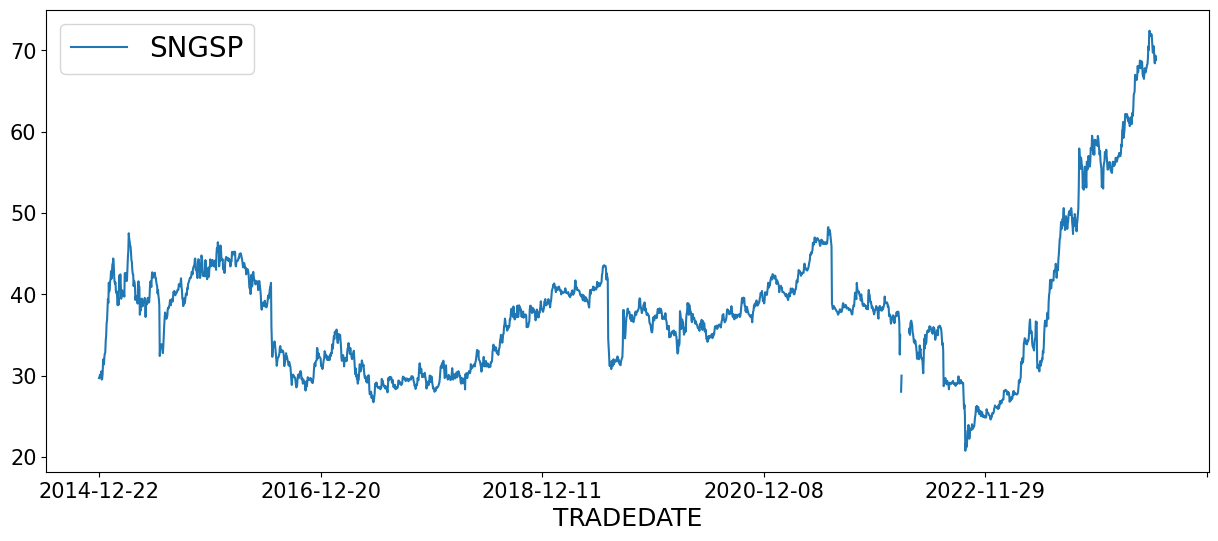

In [14]:
df[ind].plot(figsize=(15, 6), label=ticker, fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.xlabel(df.index.name, fontsize=18)

In [17]:
start='2020-05-15'
print(df[ind].loc[start:])

TRADEDATE
2020-05-15    35.950
2020-05-18    36.500
2020-05-19    36.550
2020-05-20    36.855
2020-05-21    36.015
               ...  
2024-05-30    69.660
2024-05-31    68.455
2024-06-03    68.415
2024-06-04    69.365
2024-06-05    68.835
Name: CLOSE, Length: 1029, dtype: float64


Text(0.5, 0, 'TRADEDATE')

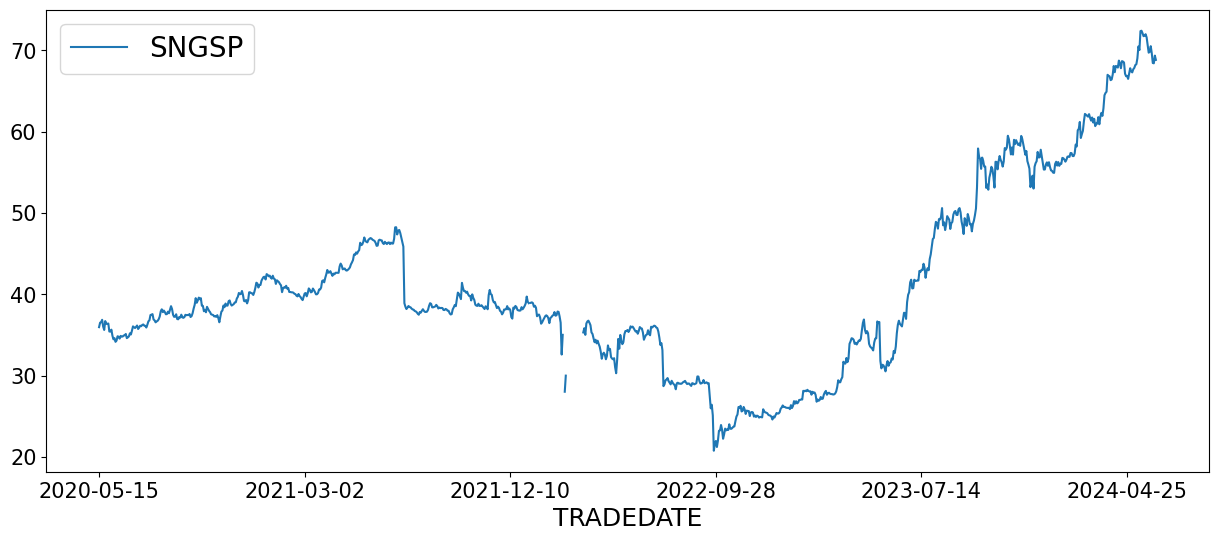

In [18]:
df[ind].loc[start:].plot(figsize=(15, 6), label=ticker,
                             fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.xlabel(df.index.name, fontsize=18)

In [19]:
!pip install requests-html
!pip install yahoo-fin

  Obtaining dependency information for requests-html from https://files.pythonhosted.org/packages/24/bc/a4380f09bab3a776182578ce6b2771e57259d0d4dbce178205779abdc347/requests_html-0.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyquery from https://files.pythonhosted.org/packages/36/b7/f7ccf9e52e2817e1265d3719c600fa4ef33c07de4d5ef0ced3f43ab1cef2/pyquery-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for fake-useragent from https://files.pythonhosted.org/packages/e4/99/60d8cf1b26938c2e0a57e232f7f15641dfcd6f8deda454d73e4145910ff6/fake_useragent-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for parse from https://files.pythonhosted.org/packages/ce/f0/30fe1494f1910ad3ea40639b13ac48cdb16a8600e8861cbfc2c560661ddf/parse-1.20.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for bs4 from https://files.pythonhosted.org/packages/51/bb/bf7aab772a159614954d84aa832c129624ba6c32faa559dfb200a534e50b/bs4-0.0.2-py2.py3-non

In [20]:
import webbrowser
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Yahoo! Finance, Stocs screener, Most Active >>
url="https://finance.yahoo.com/most-active?offset=0&count=100&guccounter=1"
webbrowser.open(url)

# YAHOO_FIN DOCUMENTATION
url="http://theautomatic.net/yahoo_fin-documentation/"
webbrowser.open(url)

# What Is the S&P 500 Index?
url="https://www.investopedia.com/terms/s/sp500.asp"
webbrowser.open(url)

True

In [22]:
## get list of S&P 500 tickers >>>
# True means that company names, and sector information
#  is returned as a data frame.
sp = si.tickers_sp500(True)
display(sp)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [23]:
# Most Active US Stocks: What's the Buzz About?
url="https://fi.money/blog/posts/all-about-active-stocks-in-the-us-stock-market"
webbrowser.open(url)

True

In [24]:
# get most active stocks on the day >>
ma = si.get_day_most_active()
display(ma)

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,HPE,Hewlett Packard Enterprise Company,19.48,1.88,10.68,85697000.0,15764000.0,25318000000.0,14.22
1,GME,GameStop Corp.,31.57,5.07,19.13,69083000.0,28227000.0,11087000000.0,1578.50
2,MARA,"Marathon Digital Holdings, Inc.",21.07,0.55,2.68,62540000.0,49487000.0,5958000000.0,13.17
3,PLUG,Plug Power Inc.,3.01,-0.21,-6.52,57714000.0,33984000.0,2235000000.0,NaN
4,AMD,"Advanced Micro Devices, Inc.",166.17,6.18,3.86,59621000.0,58964000.0,268582000000.0,237.39
...,...,...,...,...,...,...,...,...,...
95,CVS,CVS Health Corporation,60.70,0.44,0.73,8878000.0,12126000.0,76201000000.0,10.65
96,QCOM,QUALCOMM Incorporated,211.90,7.53,3.68,11030000.0,8699000.0,236480000000.0,28.25
97,HBAN,Huntington Bancshares Incorporated,13.43,-0.05,-0.37,8731000.0,14781000.0,19463000000.0,12.10
98,ERF,Enerplus Corporation,20.09,0.13,0.66,5466000.0,2822000.0,4103000000.0,11.22


In [25]:
# What is meant by top gainers?
url="https://technicqa.com/how-do-you-calculate-top-gainers/"
webbrowser.open(url)

True

In [26]:
# get biggest gainers >>
bg = si.get_day_gainers()
display(bg)

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,VRNT,Verint Systems Inc.,34.72,6.50,23.03,3190000.0,608561.0,2143000000.0,73.87
1,GME,GameStop Corp.,31.57,5.07,19.13,69083000.0,28227000.0,11087000000.0,1578.50
2,NVAX,"Novavax, Inc.",20.97,3.21,18.07,41759000.0,13368000.0,3089000000.0,NaN
3,GWRE,"Guidewire Software, Inc.",127.46,19.41,17.96,3288000.0,594723.0,10536000000.0,NaN
4,ACLS,"Axcelis Technologies, Inc.",127.13,15.84,14.23,1231000.0,518246.0,4136000000.0,16.82
...,...,...,...,...,...,...,...,...,...
95,RDNT,"RadNet, Inc.",61.05,2.71,4.65,590143.0,565530.0,4510000000.0,165.00
96,ILMN,"Illumina, Inc.",106.79,4.73,4.63,2863000.0,1710000.0,17012000000.0,NaN
97,SYNA,Synaptics Incorporated,95.48,4.21,4.61,171987.0,286741.0,3771000000.0,NaN
98,KLAC,KLA Corporation,784.97,34.41,4.58,921900.0,857661.0,105688000000.0,41.16


In [27]:
# get worst performers >>
wp = si.get_day_losers()
display(wp)

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,ZK,ZEEKR Intelligent Technology Holding Limited,23.84,-1.83,-7.13,657296.0,1679000.0,5.902000e+09,NaN
1,BF-B,Brown-Forman Corporation,43.04,-2.70,-5.90,5635000.0,2018000.0,2.037800e+10,20.11
2,FIVN,"Five9, Inc.",42.14,-2.62,-5.85,3327000.0,1286000.0,3.113000e+09,NaN
3,BF-A,Brown-Forman Corporation,43.28,-2.44,-5.34,195063.0,60288.0,2.037800e+10,20.22
4,NICE,NICE Ltd.,161.78,-9.12,-5.34,3093000.0,525017.0,1.050500e+10,29.04
5,DLTR,"Dollar Tree, Inc.",114.38,-5.92,-4.92,8736000.0,3109000.0,2.458500e+10,NaN
6,LOT,Lotus Technology Inc.,8.83,-0.45,-4.85,285375.0,169288.0,5.976000e+09,NaN
7,SMPNY,"Sompo Holdings, Inc.",10.34,-0.51,-4.70,20400.0,48401.0,2.046100e+10,7.66
8,CF,"CF Industries Holdings, Inc.",76.84,-3.67,-4.56,2863000.0,2581000.0,1.404500e+10,12.70
9,CALM,"Cal-Maine Foods, Inc.",58.08,-2.73,-4.49,517479.0,710857.0,2.848000e+09,10.30


In [28]:
# Cryptocurrencies
url="https://finance.yahoo.com/crypto/?offset=0&count=100"
webbrowser.open(url)

# Adjusted Closing Price
url="https://www.investopedia.com/terms/a/adjusted_closing_price.asp"
webbrowser.open(url)

# Volume Yahoo! Finance
url="https://stackoverflow.com/questions/38545299/volume-yahoo-finance"
webbrowser.open(url)

True

HPE AMD LCID 
 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object') 
Adjusted Closing Price >>>
                   HPE         AMD  LCID
2019-01-02  11.289502   18.830000   NaN
2019-01-03  11.054651   17.049999   NaN
2019-01-04  11.574677   19.000000   NaN
2019-01-07  11.801135   20.570000   NaN
2019-01-08  11.574677   20.750000   NaN
...               ...         ...   ...
2024-05-30  18.520000  166.750000  2.88
2024-05-31  17.650000  166.899994  2.84
2024-06-03  17.950001  163.550003  2.83
2024-06-04  17.600000  159.990005  2.85
2024-06-05  19.480000  166.169998  2.79

[1366 rows x 3 columns]


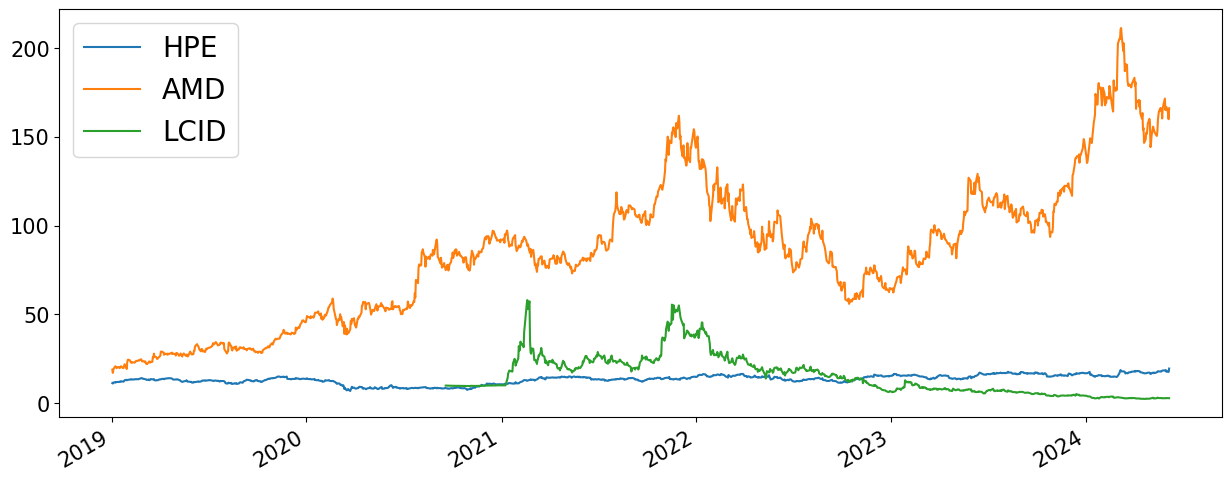

In [38]:
#
## Define list of tickers & get data
#

tickers_list = ['HPE', 'AMD', 'LCID']

start='2019-01-01'

df=pd.DataFrame()

for i in tickers_list:
 print(i, end=' ')
# tmp=si.get_data(i, start_date=start, end_date=end)
 tmp=si.get_data(i, start_date=start)
 df[i]=tmp['adjclose']

print('\n', tmp.columns,
      '\nAdjusted Closing Price >>>\n', df)

df.plot(figsize=(15, 6), fontsize=15)
plt.legend(loc='best', fontsize=20)


In [39]:
tmp.info()
print('\n', df.index.min(),'\n', df.index.max(),
      '\n\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 934 entries, 2020-09-18 to 2024-06-05
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      934 non-null    float64
 1   high      934 non-null    float64
 2   low       934 non-null    float64
 3   close     934 non-null    float64
 4   adjclose  934 non-null    float64
 5   volume    934 non-null    int64  
 6   ticker    934 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 90.7+ KB

 2019-01-02 00:00:00 
 2024-06-05 00:00:00 

 HPE       0
AMD       0
LCID    432
dtype: int64


In [40]:
import webbrowser
import requests
import apimoex
import pandas as pd
import yahoo_fin.stock_info as si
import matplotlib.pyplot as plt

In [49]:
# Moscow Exchange >>>

tickermo = 'SBER' # <- СБЕРБАНК

# История котировок (режим TQBR) >>
with requests.Session() as session:
    data = apimoex.get_board_history(session, tickermo)

In [50]:
dfmo = pd.DataFrame(data)
display(dfmo)

dfmo.set_index('TRADEDATE', inplace=True)
print('\n',dfmo,'\n', dfmo.index)

dfmo.index = pd.to_datetime(dfmo.index)
display(dfmo.index)

startmo=dfmo.index.min()

,BOARDID,TRADEDATE,CLOSE,VOLUME,VALUE
0,TQBR,2013-03-25,98.79,593680,5.934000e+07
1,TQBR,2013-03-26,97.20,1283550,1.260304e+08
2,TQBR,2013-03-27,96.75,1261950,1.218359e+08
3,TQBR,2013-03-28,98.59,1971410,1.924698e+08
4,TQBR,2013-03-29,98.76,782000,7.726886e+07
...,...,...,...,...,...
2821,TQBR,2024-05-30,316.63,27005390,8.605178e+09
2822,TQBR,2024-05-31,313.11,49206450,1.547904e+10
2823,TQBR,2024-06-03,310.95,61860770,1.913076e+10
2824,TQBR,2024-06-04,316.49,33070240,1.034696e+10



            BOARDID   CLOSE    VOLUME         VALUE
TRADEDATE                                         
2013-03-25    TQBR   98.79    593680  5.934000e+07
2013-03-26    TQBR   97.20   1283550  1.260304e+08
2013-03-27    TQBR   96.75   1261950  1.218359e+08
2013-03-28    TQBR   98.59   1971410  1.924698e+08
2013-03-29    TQBR   98.76    782000  7.726886e+07
...            ...     ...       ...           ...
2024-05-30    TQBR  316.63  27005390  8.605178e+09
2024-05-31    TQBR  313.11  49206450  1.547904e+10
2024-06-03    TQBR  310.95  61860770  1.913076e+10
2024-06-04    TQBR  316.49  33070240  1.034696e+10
2024-06-05    TQBR  314.72  27792110  8.793191e+09

[2826 rows x 4 columns] 
 Index(['2013-03-25', '2013-03-26', '2013-03-27', '2013-03-28', '2013-03-29',
       '2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05',
       ...
       '2024-05-23', '2024-05-24', '2024-05-27', '2024-05-28', '2024-05-29',
       '2024-05-30', '2024-05-31', '2024-06-03', '2024-06-04', '20

DatetimeIndex(['2013-03-25', '2013-03-26', '2013-03-27', '2013-03-28',
               '2013-03-29', '2013-04-01', '2013-04-02', '2013-04-03',
               '2013-04-04', '2013-04-05',
               ...
               '2024-05-23', '2024-05-24', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-03',
               '2024-06-04', '2024-06-05'],
              dtype='datetime64[ns]', name='TRADEDATE', length=2826, freq=None)

In [51]:
# Yahoo! Finance >>>
tickerya='META'

dfya = si.get_data(tickerya, start_date=startmo)

print('\n',dfya,'\n', dfmo.index)


                   open        high         low       close    adjclose  \
2013-03-25   25.750000   25.799999   25.080000   25.129999   25.103365   
2013-03-26   25.080000   25.480000   25.030001   25.209999   25.183279   
2013-03-27   25.000000   26.280001   24.719999   26.090000   26.062347   
2013-03-28   26.090000   26.170000   25.520000   25.580000   25.552889   
2013-04-01   25.629999   25.889999   25.280001   25.530001   25.502941   
...                ...         ...         ...         ...         ...   
2024-05-30  471.670013  471.730011  464.709991  467.049988  467.049988   
2024-05-31  465.799988  469.119995  454.459991  466.829987  466.829987   
2024-06-03  470.859985  479.600006  468.239990  477.489990  477.489990   
2024-06-04  477.000000  478.890015  473.230011  476.989990  476.989990   
2024-06-05  484.450012  496.649994  483.910004  495.059998  495.059998   

              volume ticker  
2013-03-25  39199000   META  
2013-03-26  26957200   META  
2013-03-27  5229740

In [52]:
# Merge dataframes
url="https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html"
webbrowser.open(url)

True

In [53]:
## merge >>>
#
# outer: use union of keys from both frames,
#  similar to a SQL full outer join;
# sort keys lexicographically
dfall = pd.merge(dfmo['CLOSE'], dfya['close'],
               left_index=True, right_index=True,
               how='outer')

dfall.rename(columns={'CLOSE': tickermo,
                      'close' : tickerya}, inplace=True)

print('\n', dfall)
dfall.info()


               SBER        META
2013-03-25   98.79   25.129999
2013-03-26   97.20   25.209999
2013-03-27   96.75   26.090000
2013-03-28   98.59   25.580000
2013-03-29   98.76         NaN
...            ...         ...
2024-05-30  316.63  467.049988
2024-05-31  313.11  466.829987
2024-06-03  310.95  477.489990
2024-06-04  316.49  476.989990
2024-06-05  314.72  495.059998

[2919 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2919 entries, 2013-03-25 to 2024-06-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SBER    2808 non-null   float64
 1   META    2820 non-null   float64
dtypes: float64(2)
memory usage: 68.4 KB


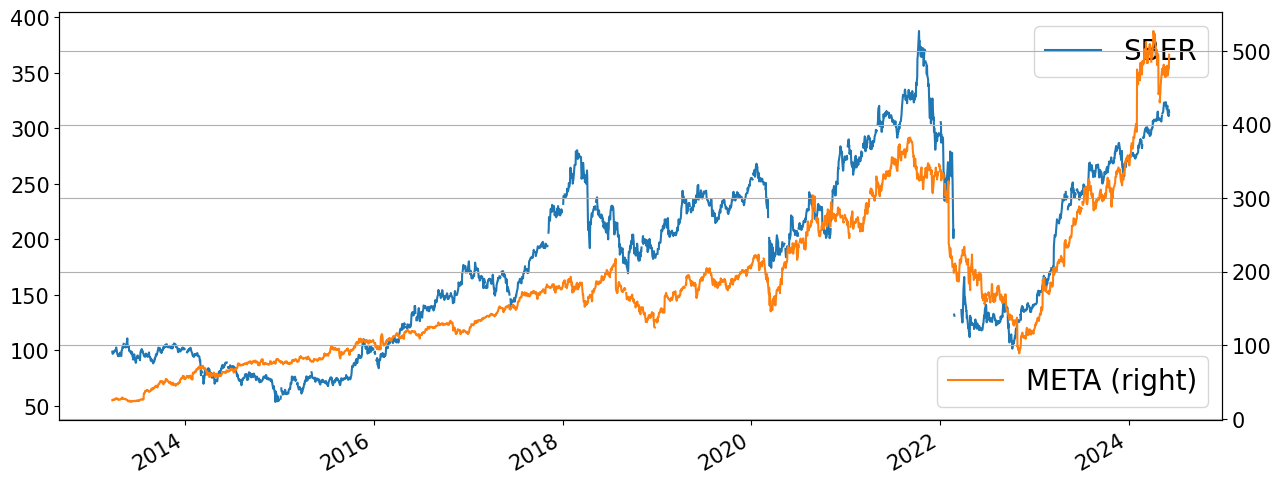

In [54]:
dfall.plot(secondary_y=[tickerya], figsize = (15, 6),
           grid=True,  fontsize=15).legend(loc='best',
                                           fontsize=20)
plt.legend(loc='lower right', fontsize=20)

Text(0.5, 1.0, 'Close')

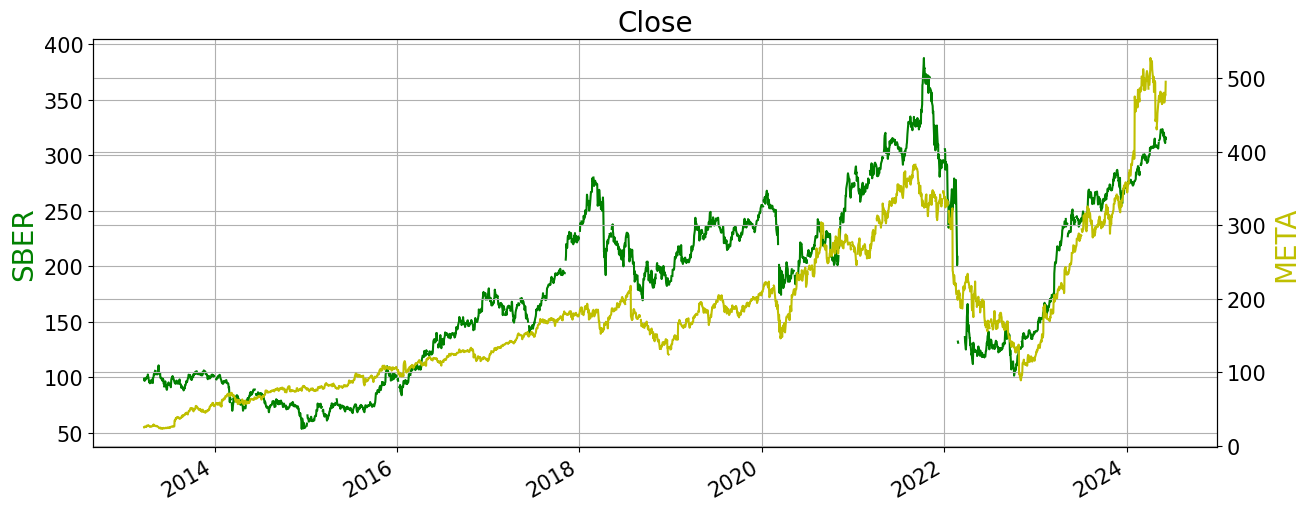

In [55]:
dfall.loc[:,tickermo].plot(figsize = (14.5, 6), grid=True,
                                   fontsize=15, color='g')
plt.ylabel(tickermo, fontsize=20, color='g')
plt.xlabel('', fontsize=15)
dfall.loc[:,tickerya].plot(secondary_y=True, grid=True,
                                    fontsize=15, color='y')
plt.ylabel(tickerya, fontsize=20, color='y')
plt.title('Close', fontsize=20)

In [56]:
import pandas as pd
import yahoo_fin.stock_info as si
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

In [57]:
# initializing tcl/tk interpreter >>
window = tk.Tk()
# open filedialog window on top of other windows >>
window.wm_attributes('-topmost', 1)
# this will close empty tk-window after filedialog >>
window.withdraw()

''

In [58]:
#
## save data on disk >>>
#
def save(d, sf):
  print('\nSaving data in\n', sf)
  case = sf.split('.')[-1]
  if case=="xlsx":
    d.to_excel(sf)
  elif case=="dta":
    d.to_stata(sf)
  elif case=="csv":
    d.to_csv(sf)
  else:
    print('\nError: >>> Unknown file name extension!!!')

In [59]:
# match/case in Python 3.10 !!! >>
def save10(d, sf):
  print('\nSaving data in\n', sf)
  case = sf.split('.')[-1]
  match case:
    case "xlsx":
      d.to_excel(sf)
    case "dta":
      d.to_stata(sf)
    case "csv":
      d.to_csv(sf)
    case _:
      print('\nError: >>> Unknown file name extension!!!')

In [60]:
# biggest gainers >>
ma = si.get_day_gainers()
for i in ma.index:
    print(i,'->', ma.Symbol[i], end='   ')

0 -> VRNT   1 -> GME   2 -> NVAX   3 -> GWRE   4 -> ACLS   5 -> SG   6 -> CYTK   7 -> TWST   8 -> CRWD   9 -> ZIM   10 -> NEMCL   11 -> GH   12 -> FLNC   13 -> HPE   14 -> MMYT   15 -> AGL   16 -> NRSCF   17 -> RDDT   18 -> SMMT   19 -> FTRE   20 -> ASML   21 -> OLLI   22 -> VECO   23 -> VEON   24 -> ARM   25 -> SFTBY   26 -> ASPN   27 -> WOLF   28 -> RXRX   29 -> UPST   30 -> BROS   31 -> CRDO   32 -> CLS   33 -> TSM   34 -> MKSI   35 -> CAMT   36 -> MRNA   37 -> RUN   38 -> WING   39 -> SITM   40 -> IRTC   41 -> ONTO   42 -> FIX   43 -> AVGO   44 -> NTES   45 -> DJTWW   46 -> KYMR   47 -> FND   48 -> JOBY   49 -> GBOOY   50 -> DNLI   51 -> ZETA   52 -> CMPR   53 -> ANGPY   54 -> MU   55 -> LEGN   56 -> LITE   57 -> ASR   58 -> UCTT   59 -> RMBS   60 -> VRT   61 -> WSM   62 -> PAY   63 -> SHAK   64 -> AMBA   65 -> LRCX   66 -> NVMI   67 -> HDB   68 -> AMAT   69 -> AMKR   70 -> STX   71 -> NVDA   72 -> MRVL   73 -> MLTX   74 -> INTR   75 -> HCC   76 -> PSTG   77 -> RNECY   78 -> FORM  

In [61]:
ma.shape
ma.shape[0]

100

In [62]:
for i in range(ma.shape[0]):
    print(i, end='  ')

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  

In [63]:
dfall=pd.DataFrame()

In [64]:
# just for 10 tickers >>>
for i in range(10):
  print(i, end='  ')
  dfall=pd.concat([dfall,si.get_data(ma.Symbol[i],
                                   start_date='2020-1-1')])

print('\n', dfall.columns,'\n',dfall.ticker.value_counts())

0  1  2  3  4  5  6  7  8  9  
 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object') 
 VRNT    1114
GME     1114
NVAX    1114
GWRE    1114
ACLS    1114
CYTK    1114
TWST    1114
CRWD    1114
ZIM      844
SG       639
Name: ticker, dtype: int64


Text(0.5, 1.0, 'adjclose')

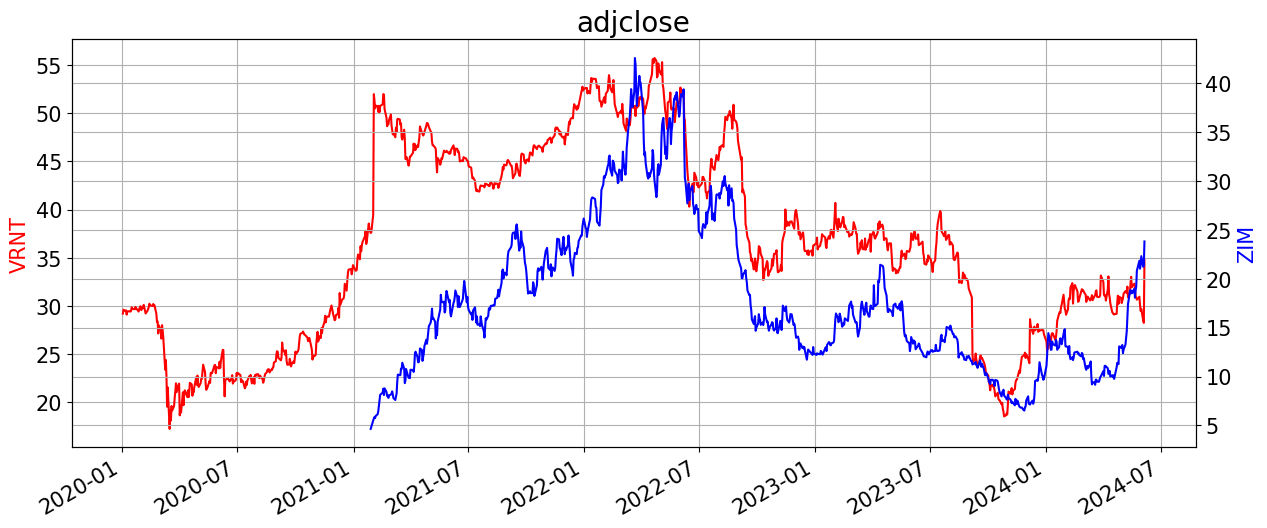

In [65]:
pv='adjclose' # <- value to plot
t1=dfall.ticker[0]    # <- ticker to plot
t2=dfall.ticker[-1]   # <- ticker to plot

dfall[pv][dfall.ticker==t1].plot(figsize = (14.5, 6), grid=True,
                                   fontsize=15, color='r')
plt.ylabel(t1, fontsize=15, color='r')
dfall[pv][dfall.ticker==t2].plot(secondary_y=True, grid=True,
                                    fontsize=15, color='b')
plt.ylabel(t2, fontsize=15, color='b')
plt.title(pv, fontsize=20)

In [66]:
##  PANEL DATA  >>>>>>>>
#
# declare panel >>
dfall['date']=dfall.index
'''
dfall.set_index(['ticker', dfall.index], inplace=True)
'''
dfall.set_index(['ticker', 'date'], inplace=True)

In [67]:
dfall.index
dfall
dfall.T
dfall[['open','close']]
dfall.loc[:,'open':'close']
dfall.loc[t1,'open':'close']
dfall.loc[t1,'adjclose']

date
2020-01-02    29.190016
2020-01-03    29.587366
2020-01-06    29.439632
2020-01-07    29.521141
2020-01-08    29.077942
                ...    
2024-05-30    29.459999
2024-05-31    29.660000
2024-06-03    28.500000
2024-06-04    28.219999
2024-06-05    34.720001
Name: adjclose, Length: 1114, dtype: float64

Text(0.5, 1.0, 'adjclose')

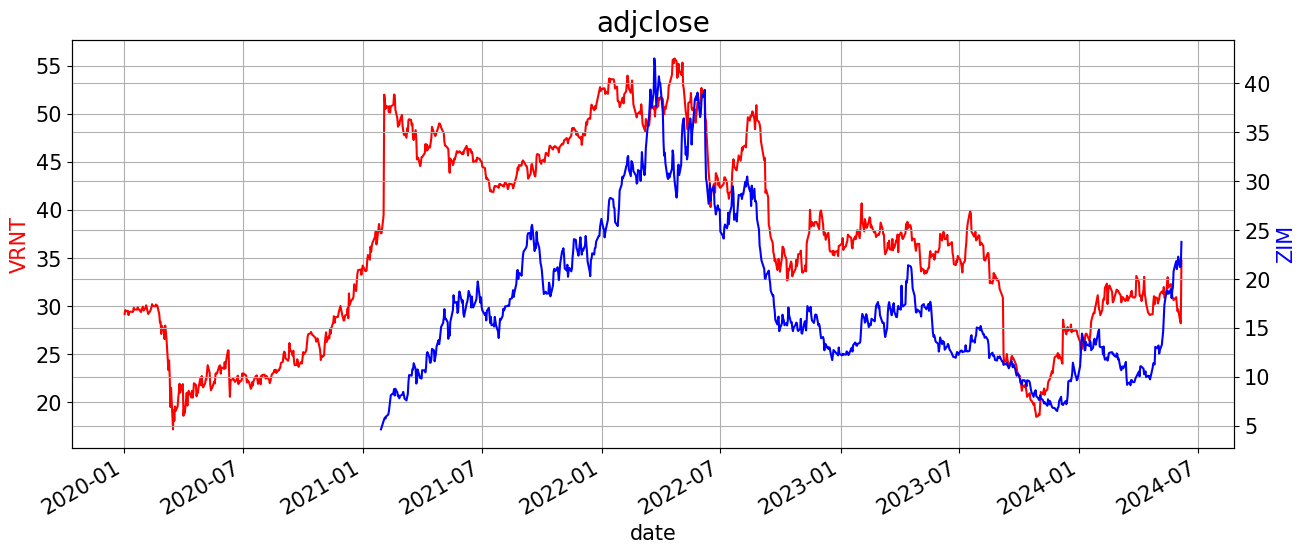

In [68]:
# the same plot as before using panel data >>
dfall.loc[t1,pv].plot(figsize = (15, 6), grid=True,
                                   fontsize=15, color='r')
plt.ylabel(t1, fontsize=15, color='r')
plt.xlabel(dfall.index.names[1], fontsize=15)
dfall.loc[t2,pv].plot(secondary_y=True, grid=True,
                                    fontsize=15, color='b')
plt.ylabel(t2, fontsize=15, color='b')
plt.title(pv, fontsize=20)

In [71]:
# choose filename to save data on disk >>>
SfileName = filedialog.asksaveasfilename(
  title="Define file name & extension",
                    filetypes=(("Data files",
                                "*.xlsx *.dta *.csv"),
                               ("All files", "*.*")),
                    parent=window)
'''
print('\nSaving data in\n', SfileName.partition('.'))
print('\nSaving data in\n', SfileName.split('.'))
print('\nSaving data in\n', SfileName.split('.')[-1])
'''
# save data on disk >>>
save(dfall, SfileName)


Saving data in
 C:/Users/mixas/accounting_entries/Книга1.xlsx


In [72]:
import requests
import apimoex
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import webbrowser

In [73]:
api_url='https://iss.moex.com/iss/statistics/engines/stock/markets/index/analytics/IMOEX.json'

# composition of the moscow exchange index >>
with requests.Session() as session:
  data = apimoex.ISSClient(session, api_url).get_all()

df_tcr = pd.DataFrame(data['analytics'])
print(df_tcr)

   indexid   tradedate ticker  shortnames secids  weight  tradingsession
0    IMOEX  2024-06-05   AFKS  Система ао   AFKS    0.85               3
1    IMOEX  2024-06-05   AFLT    Аэрофлот   AFLT    0.80               3
2    IMOEX  2024-06-05   AGRO    AGRO-гдр   AGRO    0.89               3
3    IMOEX  2024-06-05   ALRS   АЛРОСА ао   ALRS    1.31               3
4    IMOEX  2024-06-05   BSPB      БСП ао   BSPB    0.44               3
5    IMOEX  2024-06-05   CBOM      МКБ ао   CBOM    0.62               3
6    IMOEX  2024-06-05   CHMF    СевСт-ао   CHMF    2.51               3
7    IMOEX  2024-06-05   ENPG  ЭН+ГРУП ао   ENPG    0.41               3
8    IMOEX  2024-06-05   FEES     Россети   FEES    0.42               3
9    IMOEX  2024-06-05   FIVE    FIVE-гдр   FIVE    1.10               3
10   IMOEX  2024-06-05   FLOT  Совкомфлот   FLOT    0.59               3
11   IMOEX  2024-06-05   GAZP  ГАЗПРОМ ао   GAZP    9.04               3
12   IMOEX  2024-06-05   GLTR    GLTR-гдр   GLTR   

In [74]:
# tickers to get data >>
tickers=[ df_tcr.ticker[1], df_tcr.ticker[33], df_tcr.ticker[40] ]

df=pd.DataFrame(columns=['tcr'])

In [75]:
start='2019-12-01' # <- first day to get data

# trade history for tickers >>
for tcr in tickers:
  print(tcr, end=" ")
  with requests.Session() as session:
    new_row = pd.Series({'tcr': tcr})
    df=pd.concat( [df, new_row.to_frame().T,
          pd.DataFrame( apimoex.get_board_history(session, tcr, start=start) )] )

# fill tcr NaN values with the previous row values >>
df.tcr.fillna(method='ffill', inplace=True)
# drop rows with NaN TRADEDATE >>
df=df[df['TRADEDATE'].notna()]

print('\n\n', df, '\n')
df.info()

AFLT RUAL SNGSP 

         tcr BOARDID   TRADEDATE    CLOSE       VOLUME         VALUE
0      AFLT    TQBR  2019-12-02  102.240    7032780.0  7.231169e+08
1      AFLT    TQBR  2019-12-03  100.700    4704750.0  4.778743e+08
2      AFLT    TQBR  2019-12-04  101.200    5457130.0  5.501873e+08
3      AFLT    TQBR  2019-12-05  102.180    1728720.0  1.761358e+08
4      AFLT    TQBR  2019-12-06  102.200    1047020.0  1.070014e+08
...     ...     ...         ...      ...          ...           ...
1135  SNGSP    TQBR  2024-05-30   69.660   21790700.0  1.525335e+09
1136  SNGSP    TQBR  2024-05-31   68.455   60955900.0  4.194776e+09
1137  SNGSP    TQBR  2024-06-03   68.415  118083100.0  7.910023e+09
1138  SNGSP    TQBR  2024-06-04   69.365   39852200.0  2.746078e+09
1139  SNGSP    TQBR  2024-06-05   68.835   30449600.0  2.099849e+09

[3420 rows x 6 columns] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 0 to 1139
Data columns (total 6 columns):
 #   Column     Non-Null Count  

In [76]:
'''
BOARDID	Код режима	Идентификатор режима торгов, shares are indicated by TQBR
CLOSE	Последняя	Цена последней сделки
VOLUME	Объем, шт.	Объем сделок за день, штук ценных бумаг
VALUE	Объем	Объем сделок за день
'''
print('\nCount NaN values:\n', df.isnull().sum() )


Count NaN values:
 tcr           0
BOARDID       0
TRADEDATE     0
CLOSE        58
VOLUME        0
VALUE         0
dtype: int64


In [77]:
# choose column to plot >>
ind='VALUE'
ind='VOLUME'
ind='CLOSE'

True

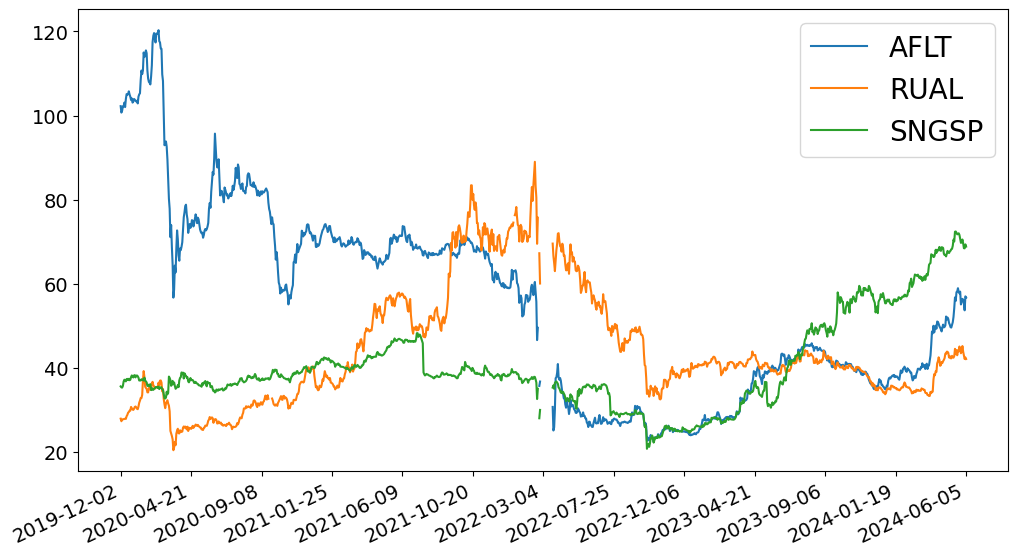

In [78]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
plt.xticks(np.arange(0, max(df.index)+1, max(df.index)/12), rotation=25, ha='right')
for tcr in tickers:
  plt.plot(df.TRADEDATE[df.tcr==tcr], df[ind][df.tcr==tcr], label=tcr)
plt.legend(loc='best', fontsize=20)
#%%
# Matplotlib x-axis label
webbrowser.open("https://pythonguides.com/matplotlib-x-axis-label/")
